In [105]:
import pandas as pd
data = pd.read_csv('datos_consumo_electrico_2018_2022.csv')

In [5]:
descripcion = data.describe()
info=data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789553 entries, 0 to 1789552
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   substation   object 
 1   year         int64  
 2   month        int64  
 3   day          int64  
 4   hour         int64  
 5   consumption  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 81.9+ MB


In [6]:
print(info)

None


In [7]:
print(data.head())


  substation  year  month  day  hour  consumption
0    AJAHUEL  2018      1    1     0   -28.761417
1    AJAHUEL  2018      1    1     0    94.511155
2    AJAHUEL  2018      1    1     0   100.250373
3    AJAHUEL  2018      1    1     0   -28.669271
4    AJAHUEL  2018      1    1     1   -26.769412


In [8]:
print(data.describe())

               year         month           day          hour   consumption
count  1.789553e+06  1.789553e+06  1.789553e+06  1.789553e+06  1.789553e+06
mean   2.020094e+03  6.412154e+00  1.570166e+01  1.150212e+01  3.252468e+01
std    1.445269e+00  3.412864e+00  8.795105e+00  6.922741e+00  7.413949e+01
min    2.018000e+03  1.000000e+00  1.000000e+00  0.000000e+00 -3.776391e+02
25%    2.019000e+03  4.000000e+00  8.000000e+00  6.000000e+00 -2.807174e+00
50%    2.020000e+03  6.000000e+00  1.600000e+01  1.200000e+01  4.452032e+01
75%    2.021000e+03  9.000000e+00  2.300000e+01  1.800000e+01  8.163271e+01
max    2.022000e+03  1.200000e+01  3.100000e+01  2.300000e+01  3.199903e+02


In [9]:
print(data.nunique())


substation           7
year                 5
month               12
day                 31
hour                24
consumption    1583210
dtype: int64


In [10]:
print(data.isnull().sum())

substation     0
year           0
month          0
day            0
hour           0
consumption    0
dtype: int64


In [11]:
print(data.dtypes)

substation      object
year             int64
month            int64
day              int64
hour             int64
consumption    float64
dtype: object


In [12]:
missing_values = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)


Valores faltantes por columna:
 substation     0
year           0
month          0
day            0
hour           0
consumption    0
dtype: int64


In [13]:
duplicate_values = data.duplicated().sum()
print("Cantidad de valores duplicados:", duplicate_values)

Cantidad de valores duplicados: 16364


In [14]:
data_types = data.dtypes
print("Tipos de datos por columna:\n", data_types)


Tipos de datos por columna:
 substation      object
year             int64
month            int64
day              int64
hour             int64
consumption    float64
dtype: object


In [15]:
unique_values = data.nunique()
print("Valores únicos por columna:\n", unique_values)


Valores únicos por columna:
 substation           7
year                 5
month               12
day                 31
hour                24
consumption    1583210
dtype: int64


In [16]:
descriptive_stats = data.describe(include='all')
print("Estadísticas descriptivas:\n", descriptive_stats)


Estadísticas descriptivas:
        substation          year         month           day          hour  \
count     1789553  1.789553e+06  1.789553e+06  1.789553e+06  1.789553e+06   
unique          7           NaN           NaN           NaN           NaN   
top        CNAVIA           NaN           NaN           NaN           NaN   
freq       412974           NaN           NaN           NaN           NaN   
mean          NaN  2.020094e+03  6.412154e+00  1.570166e+01  1.150212e+01   
std           NaN  1.445269e+00  3.412864e+00  8.795105e+00  6.922741e+00   
min           NaN  2.018000e+03  1.000000e+00  1.000000e+00  0.000000e+00   
25%           NaN  2.019000e+03  4.000000e+00  8.000000e+00  6.000000e+00   
50%           NaN  2.020000e+03  6.000000e+00  1.600000e+01  1.200000e+01   
75%           NaN  2.021000e+03  9.000000e+00  2.300000e+01  1.800000e+01   
max           NaN  2.022000e+03  1.200000e+01  3.100000e+01  2.300000e+01   

         consumption  
count   1.789553e+06  
u

In [18]:
# Obtener los nombres de las columnas
nombres_columnas = data.columns

# Imprimir los nombres de las columnas
print(nombres_columnas)


Index(['substation', 'year', 'month', 'day', 'hour', 'consumption'], dtype='object')


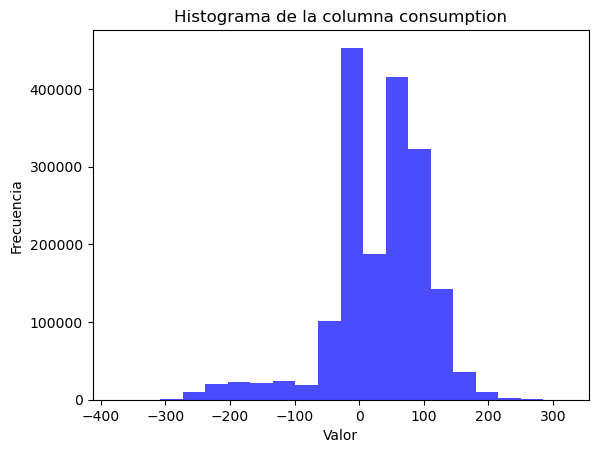

In [11]:
import matplotlib.pyplot as plt

plt.hist(data['consumption'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna consumption')
plt.show()

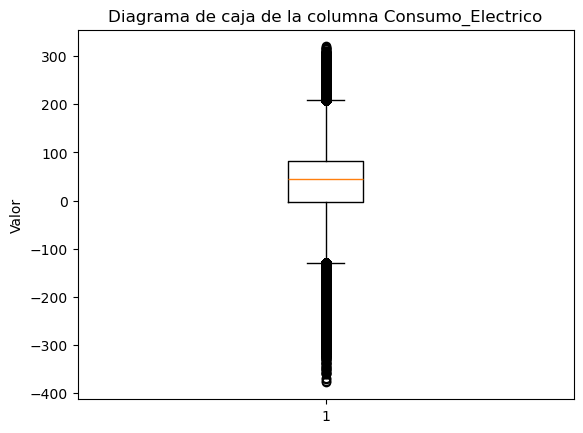

In [22]:
plt.boxplot(data['consumption'])
plt.ylabel('Valor')
plt.title('Diagrama de caja de la columna Consumo_Electrico')
plt.show()


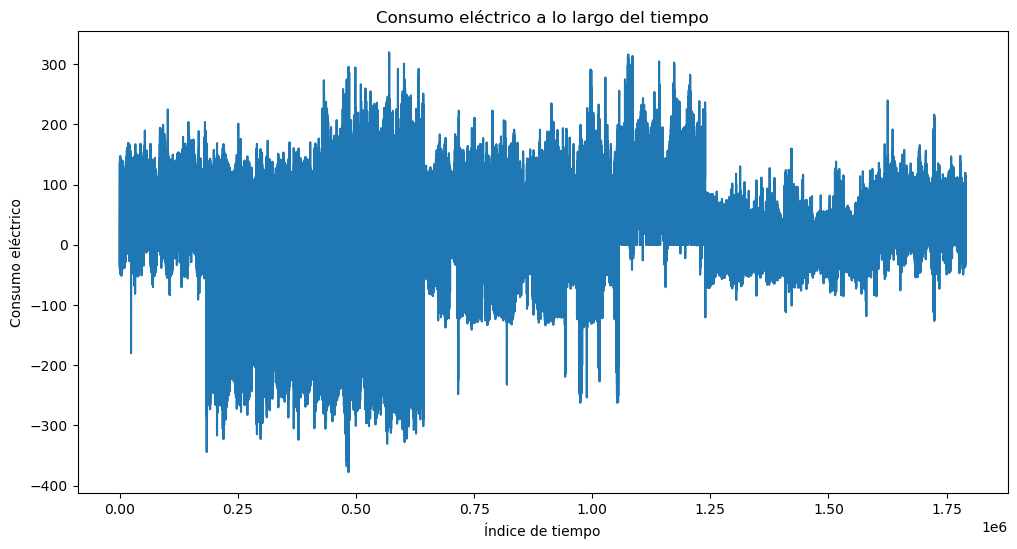

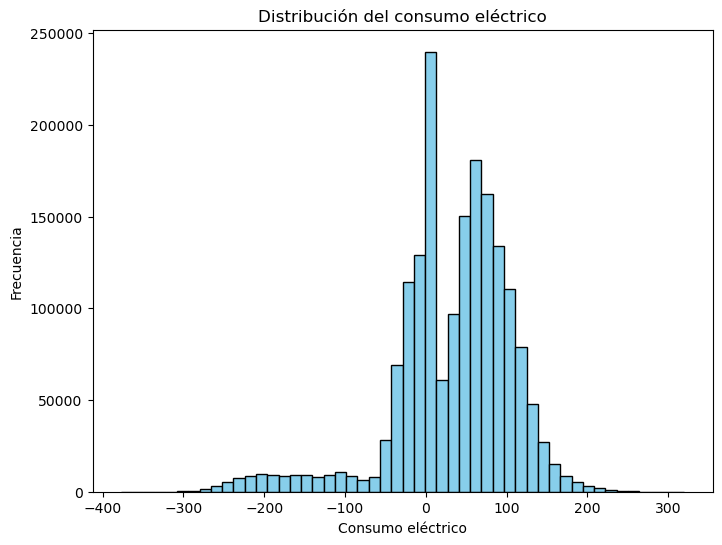

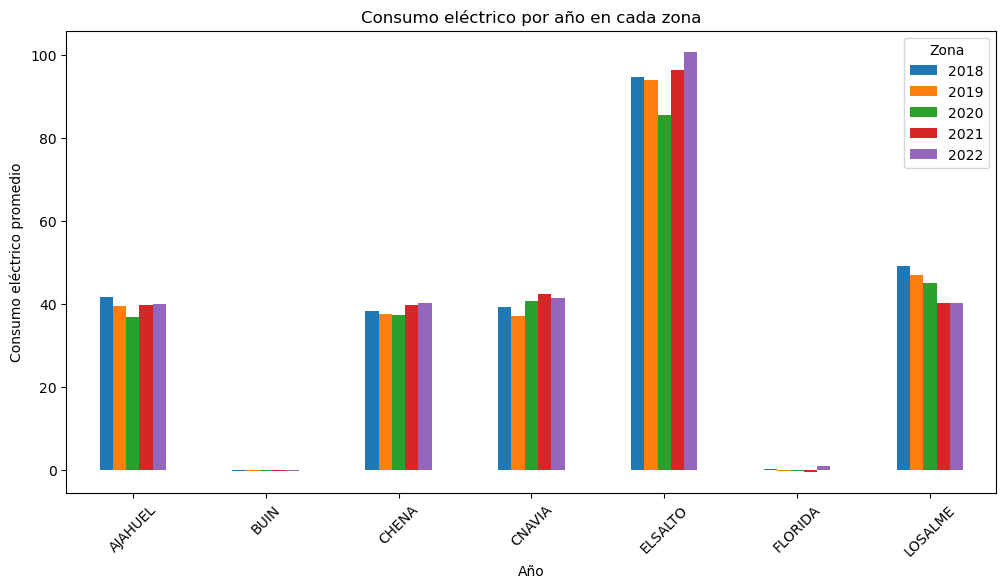

In [23]:
# Graficar el consumo eléctrico a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(data['consumption'])
plt.title('Consumo eléctrico a lo largo del tiempo')
plt.xlabel('Índice de tiempo')
plt.ylabel('Consumo eléctrico')
plt.show()

# Visualizar la distribución del consumo eléctrico
plt.figure(figsize=(8, 6))
plt.hist(data['consumption'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución del consumo eléctrico')
plt.xlabel('Consumo eléctrico')
plt.ylabel('Frecuencia')
plt.show()

# Convertir la columna 'year' a tipo datetime
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Agrupar los datos por zona y año, y calcular el consumo promedio por año
consumo_por_zona_y_anio = data.groupby(['substation', data['year'].dt.year])['consumption'].mean().unstack()

# Graficar el consumo por año en cada zona
consumo_por_zona_y_anio.plot(kind='bar', figsize=(12, 6))
plt.title('Consumo eléctrico por año en cada zona')
plt.xlabel('Año')
plt.ylabel('Consumo eléctrico promedio')
plt.legend(title='Zona')
plt.xticks(rotation=45)
plt.show()

# All Data Model  1:(2018-2021)   2:(2022)

In [95]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar los datos de consumo eléctrico de 2018 a 2021 para entrenamiento
train_data = pd.read_csv('datos_consumo_electrico_2018_2021.csv')

# Cargar los datos de consumo eléctrico de 2022 para prueba
test_data = pd.read_csv('datos_consumo_electrico_2022.csv')

# Seleccionar solo las columnas numéricas
numeric_columns_train = train_data.select_dtypes(include=[np.number]).columns
numeric_columns_test = test_data.select_dtypes(include=[np.number]).columns

# Seleccionar las columnas numéricas para el entrenamiento y la prueba
X_train = train_data[numeric_columns_train]
y_train = train_data['consumption']

X_test = test_data[numeric_columns_test]
y_test = test_data['consumption']

# Normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


model = Sequential([
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='tanh'),
    Dense(1, activation='linear')
])

# Compilar el modelo
model.compile(optimizer='Adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=30, batch_size=150, validation_data=(X_test_reshaped, y_test))



# Guardar el modelo entrenado
model.save('KerasModels/ModelOne.keras')


Epoch 1/30
9079/9079 ━━━━━━━━━━━━━━━━━━━━ 57s 6ms/step - loss: 3903.1426 - val_loss: 17.4357
Epoch 2/30
9079/9079 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - loss: 4.6275 - val_loss: 0.5861
Epoch 3/30
9079/9079 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - loss: 0.6981 - val_loss: 0.2476
Epoch 4/30
9079/9079 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - loss: 0.5235 - val_loss: 0.1669
Epoch 5/30
9079/9079 ━━━━━━━━━━━━━━━━━━━━ 56s 6ms/step - loss: 0.4181 - val_loss: 0.0815
Epoch 6/30
9079/9079 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - loss: 0.3869 - val_loss: 0.1133
Epoch 7/30
9079/9079 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - loss: 0.3676 - val_loss: 0.9428
Epoch 8/30
9079/9079 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - loss: 0.3364 - val_loss: 0.8131
Epoch 9/30
9079/9079 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - loss: 0.3139 - val_loss: 0.0390
Epoch 10/30
9079/9079 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - loss: 0.2871 - val_loss: 0.2338
Epoch 11/30
9079/9079 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - loss: 0.2780 - val_loss: 0.0794
Epoch 12/30
907

In [96]:
# Evaluación del modelo
y_pred = model.predict(X_test_reshaped).flatten()  # Aplanar y_pred para convertirlo en una matriz 1D

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1))) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)



13369/13369 ━━━━━━━━━━━━━━━━━━━━ 11s 848us/step
Mean Absolute Error (MAE): 0.043696733382828645
Mean Squared Error (MSE): 0.004133557154372792
Mean Absolute Percentage Error (MAPE): 0.40376296178001575
R^2 Score: 0.9999992988357339


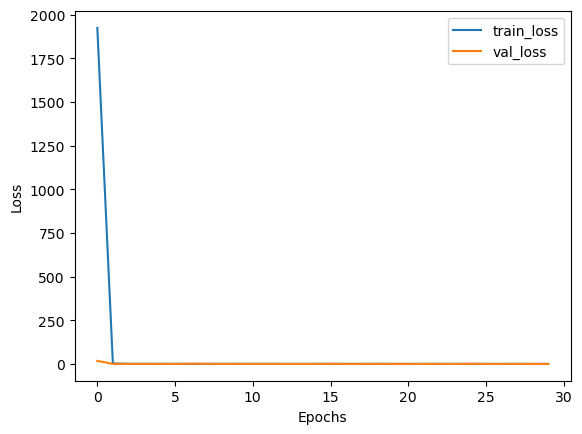

In [97]:
# Graficar la pérdida en función de las épocas
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

13369/13369 ━━━━━━━━━━━━━━━━━━━━ 11s 819us/step


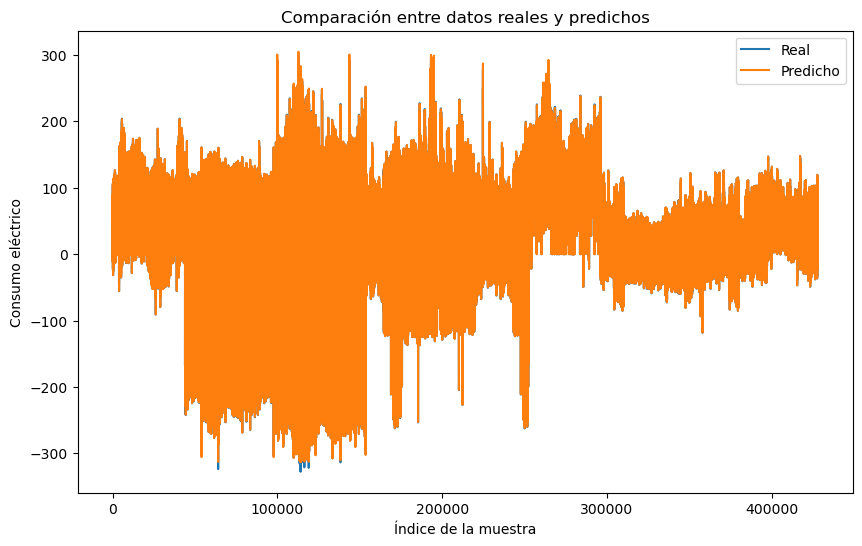

In [13]:
# Obtener las predicciones del modelo y transformarlas a 1D
predictions = model.predict(X_test_reshaped).flatten()

# Graficar la comparación entre los datos predichos y los reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real')
plt.plot(predictions, label='Predicho')
plt.title('Comparación entre datos reales y predichos')
plt.xlabel('Índice de la muestra')
plt.ylabel('Consumo eléctrico')
plt.legend()
plt.show()

# AJAHUEL Model

In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar los datos de consumo eléctrico de 2018 a 2021 para entrenamiento
train_data = pd.read_csv('substation/AJAHUEL_2018_2021.csv')

# Cargar los datos de consumo eléctrico de 2022 para prueba
test_data = pd.read_csv('substation/AJAHUEL_2022.csv')

# Seleccionar solo las columnas numéricas
numeric_columns_train = train_data.select_dtypes(include=[np.number]).columns
numeric_columns_test = test_data.select_dtypes(include=[np.number]).columns

# Seleccionar las columnas numéricas para el entrenamiento y la prueba
X_train = train_data[numeric_columns_train]
y_train = train_data['consumption']

X_test = test_data[numeric_columns_test]
y_test = test_data['consumption']

# Normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


model = Sequential([
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='tanh'),
    Dense(1, activation='linear')
])

# Compilar el modelo
model.compile(optimizer='Adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=150, validation_data=(X_test_reshaped, y_test))



# Guardar el modelo entrenado
model.save('KerasModels/ModelOneAJAHUEL.keras')

Epoch 1/50
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 3926.5586 - val_loss: 3451.5542
Epoch 2/50
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3451.3452 - val_loss: 3449.1658
Epoch 3/50
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3442.3347 - val_loss: 3449.3877
Epoch 4/50
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3105.5874 - val_loss: 350.2789
Epoch 5/50
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 154.4953 - val_loss: 85.5512
Epoch 6/50
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 29.2523 - val_loss: 40.8995
Epoch 7/50
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 10.8002 - val_loss: 23.7060
Epoch 8/50
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 6.3560 - val_loss: 14.5323
Epoch 9/50
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.8067 - val_loss: 9.2698
Epoch 10/50
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.0548 - val_loss: 5.9687
Epoch 11/50
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.0531 - val_loss: 3.8082
Epoch 12/50
932/932 ━

In [19]:
# Evaluación del modelo
y_pred = model.predict(X_test_reshaped).flatten()  # Aplanar y_pred para convertirlo en una matriz 1D

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1))) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)


1372/1372 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step
Mean Absolute Error (MAE): 0.0991849356517602
Mean Squared Error (MSE): 0.02356147419310529
Mean Absolute Percentage Error (MAPE): 2.723898247159244
R^2 Score: 0.9999931680374908


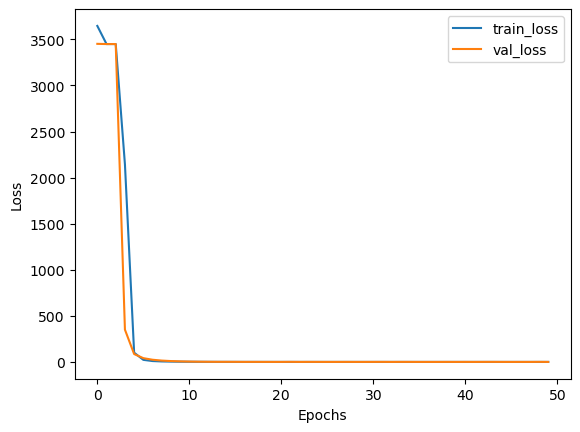

In [20]:
# Graficar la pérdida en función de las épocas
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1372/1372 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step


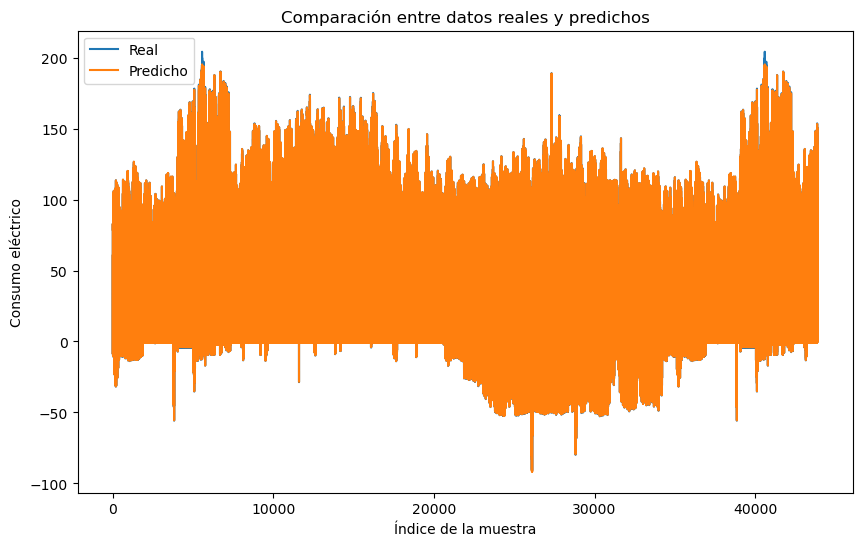

In [21]:
# Obtener las predicciones del modelo y transformarlas a 1D
predictions = model.predict(X_test_reshaped).flatten()

# Graficar la comparación entre los datos predichos y los reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real')
plt.plot(predictions, label='Predicho')
plt.title('Comparación entre datos reales y predichos')
plt.xlabel('Índice de la muestra')
plt.ylabel('Consumo eléctrico')
plt.legend()
plt.show()

# BUIN Model

In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar los datos de consumo eléctrico de 2018 a 2021 para entrenamiento
train_data = pd.read_csv('substation/BUIN_2018_2021.csv')

# Cargar los datos de consumo eléctrico de 2022 para prueba
test_data = pd.read_csv('substation/BUIN_2022.csv')

# Seleccionar solo las columnas numéricas
numeric_columns_train = train_data.select_dtypes(include=[np.number]).columns
numeric_columns_test = test_data.select_dtypes(include=[np.number]).columns

# Seleccionar las columnas numéricas para el entrenamiento y la prueba
X_train = train_data[numeric_columns_train]
y_train = train_data['consumption']

X_test = test_data[numeric_columns_test]
y_test = test_data['consumption']

# Normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


model = Sequential([
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='tanh'),
    Dense(1, activation='linear')
])

# Compilar el modelo
model.compile(optimizer='Adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=30, batch_size=80, validation_data=(X_test_reshaped, y_test))



# Guardar el modelo entrenado
model.save('KerasModels/ModelOneBUIN.keras')

Epoch 1/30
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 5622.5439 - val_loss: 850.2684
Epoch 2/30
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 595.1451 - val_loss: 110.5996
Epoch 3/30
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 87.6515 - val_loss: 13.0856
Epoch 4/30
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 13.8242 - val_loss: 3.7760
Epoch 5/30
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 3.6160 - val_loss: 0.6827
Epoch 6/30
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.3844 - val_loss: 0.7006
Epoch 7/30
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.2374 - val_loss: 1.2160
Epoch 8/30
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.7667 - val_loss: 0.3758
Epoch 9/30
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6438 - val_loss: 0.1770
Epoch 10/30
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.4045 - val_loss: 0.3376
Epoch 11/30
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.5882 - val_loss: 2.9845
Epoch 12/30
2183/

In [29]:
# Evaluación del modelo
y_pred = model.predict(X_test_reshaped).flatten()  # Aplanar y_pred para convertirlo en una matriz 1D

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1))) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 2s 843us/step
Mean Absolute Error (MAE): 0.26280887472348335
Mean Squared Error (MSE): 0.09770194168356357
Mean Absolute Percentage Error (MAPE): 7.6442191530426795
R^2 Score: 0.9999897370731189


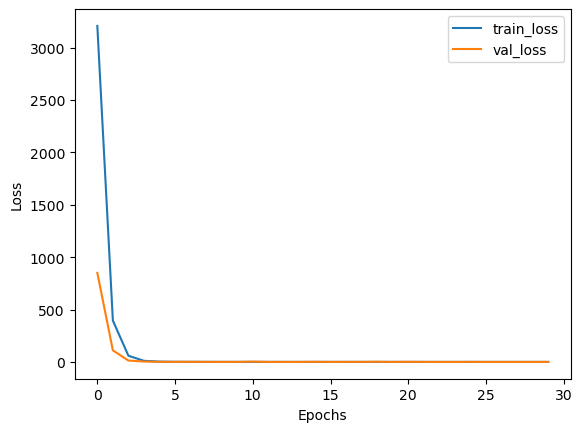

In [30]:
# Graficar la pérdida en función de las épocas
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step


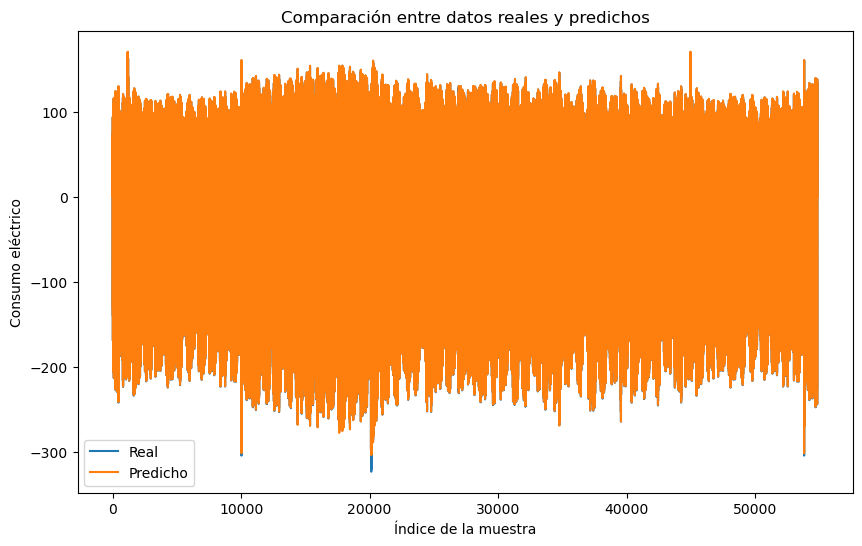

In [31]:
# Obtener las predicciones del modelo y transformarlas a 1D
predictions = model.predict(X_test_reshaped).flatten()

# Graficar la comparación entre los datos predichos y los reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real')
plt.plot(predictions, label='Predicho')
plt.title('Comparación entre datos reales y predichos')
plt.xlabel('Índice de la muestra')
plt.ylabel('Consumo eléctrico')
plt.legend()
plt.show()

# CHENA Model

In [32]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar los datos de consumo eléctrico de 2018 a 2021 para entrenamiento
train_data = pd.read_csv('substation/CHENA_2018_2021.csv')

# Cargar los datos de consumo eléctrico de 2022 para prueba
test_data = pd.read_csv('substation/CHENA_2022.csv')

# Seleccionar solo las columnas numéricas
numeric_columns_train = train_data.select_dtypes(include=[np.number]).columns
numeric_columns_test = test_data.select_dtypes(include=[np.number]).columns

# Seleccionar las columnas numéricas para el entrenamiento y la prueba
X_train = train_data[numeric_columns_train]
y_train = train_data['consumption']

X_test = test_data[numeric_columns_test]
y_test = test_data['consumption']

# Normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


model = Sequential([
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='tanh'),
    Dense(1, activation='linear')
])

# Compilar el modelo
model.compile(optimizer='Adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=150, validation_data=(X_test_reshaped, y_test))



# Guardar el modelo entrenado
model.save('KerasModels/ModelOneCHENA.keras')

Epoch 1/50
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 15129.0840 - val_loss: 16120.9531
Epoch 2/50
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 14711.2373 - val_loss: 16121.2070
Epoch 3/50
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 7851.3262 - val_loss: 1812.9520
Epoch 4/50
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1082.1654 - val_loss: 690.1490
Epoch 5/50
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 388.9367 - val_loss: 277.9866
Epoch 6/50
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 141.3031 - val_loss: 111.8750
Epoch 7/50
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 50.6886 - val_loss: 46.0851
Epoch 8/50
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 19.2083 - val_loss: 25.9379
Epoch 9/50
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 8.2744 - val_loss: 11.4731
Epoch 10/50
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.2820 - val_loss: 8.5786
Epoch 11/50
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2.4878 - val_los

In [33]:
# Evaluación del modelo
y_pred = model.predict(X_test_reshaped).flatten()  # Aplanar y_pred para convertirlo en una matriz 1D

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1))) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step
Mean Absolute Error (MAE): 0.29224891963657
Mean Squared Error (MSE): 0.0984543693235355
Mean Absolute Percentage Error (MAPE): 0.43344491810502866
R^2 Score: 0.9999938916730349


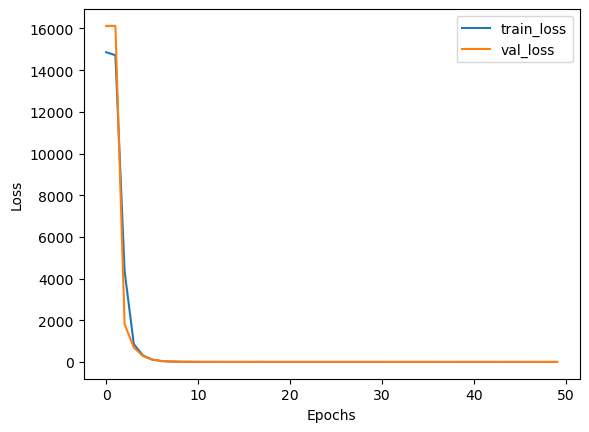

In [34]:
# Graficar la pérdida en función de las épocas
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step


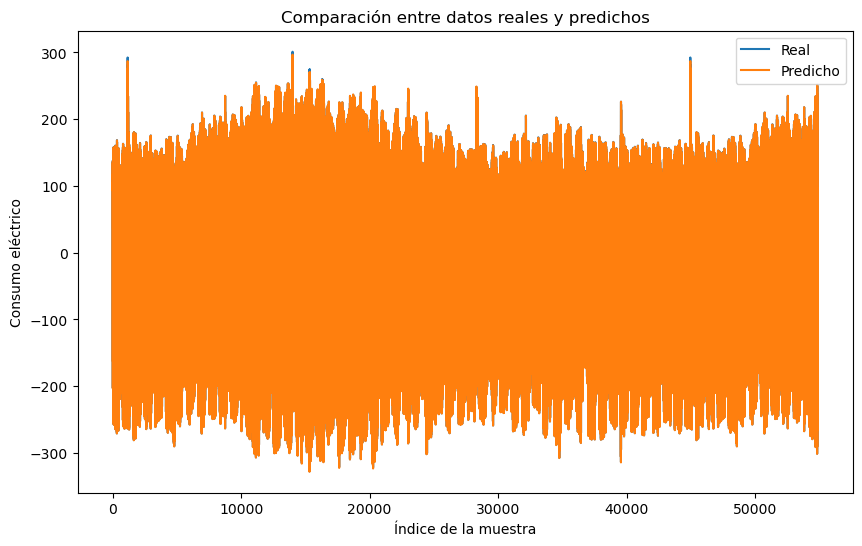

In [36]:
# Obtener las predicciones del modelo y transformarlas a 1D
predictions = model.predict(X_test_reshaped).flatten()

# Graficar la comparación entre los datos predichos y los reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real')
plt.plot(predictions, label='Predicho')
plt.title('Comparación entre datos reales y predichos')
plt.xlabel('Índice de la muestra')
plt.ylabel('Consumo eléctrico')
plt.legend()
plt.show()

# CNAVIA Model

In [53]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar los datos de consumo eléctrico de 2018 a 2021 para entrenamiento
train_data = pd.read_csv('substation/CNAVIA_2018_2021.csv')

# Cargar los datos de consumo eléctrico de 2022 para prueba
test_data = pd.read_csv('substation/CNAVIA_2022.csv')

# Seleccionar solo las columnas numéricas
numeric_columns_train = train_data.select_dtypes(include=[np.number]).columns
numeric_columns_test = test_data.select_dtypes(include=[np.number]).columns

# Seleccionar las columnas numéricas para el entrenamiento y la prueba
X_train = train_data[numeric_columns_train]
y_train = train_data['consumption']

X_test = test_data[numeric_columns_test]
y_test = test_data['consumption']

# Normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


model = Sequential([
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='tanh'),
    Dense(1, activation='linear')
])

# Compilar el modelo
model.compile(optimizer='Adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=20, validation_data=(X_test_reshaped, y_test))



# Guardar el modelo entrenado
model.save('KerasModels/ModelOneCNAVIA.keras')

Epoch 1/20
15713/15713 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 2083.7949 - val_loss: 33.2902
Epoch 2/20
15713/15713 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 1.0079 - val_loss: 14.3194
Epoch 3/20
15713/15713 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.5144 - val_loss: 8.6664
Epoch 4/20
15713/15713 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.4670 - val_loss: 6.7183
Epoch 5/20
15713/15713 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.4717 - val_loss: 5.9134
Epoch 6/20
15713/15713 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.4443 - val_loss: 9.9001
Epoch 7/20
15713/15713 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.3875 - val_loss: 4.5272
Epoch 8/20
15713/15713 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.3326 - val_loss: 3.3295
Epoch 9/20
15713/15713 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.4734 - val_loss: 4.0827
Epoch 10/20
15713/15713 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.4021 - val_loss: 9.1652
Epoch 11/20
15713/15713 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.3807 - val_loss:

In [54]:
# Evaluación del modelo
y_pred = model.predict(X_test_reshaped).flatten()  # Aplanar y_pred para convertirlo en una matriz 1D

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1))) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)

3086/3086 ━━━━━━━━━━━━━━━━━━━━ 3s 834us/step
Mean Absolute Error (MAE): 0.23309138686634756
Mean Squared Error (MSE): 2.6507527167127614
Mean Absolute Percentage Error (MAPE): 0.39941989549816226
R^2 Score: 0.999335203496377


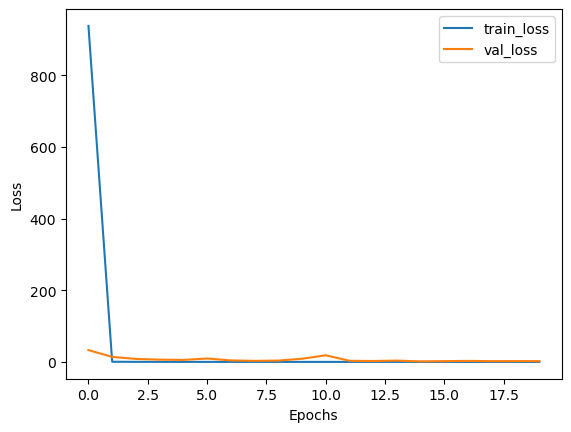

In [55]:
# Graficar la pérdida en función de las épocas
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

3086/3086 ━━━━━━━━━━━━━━━━━━━━ 3s 853us/step


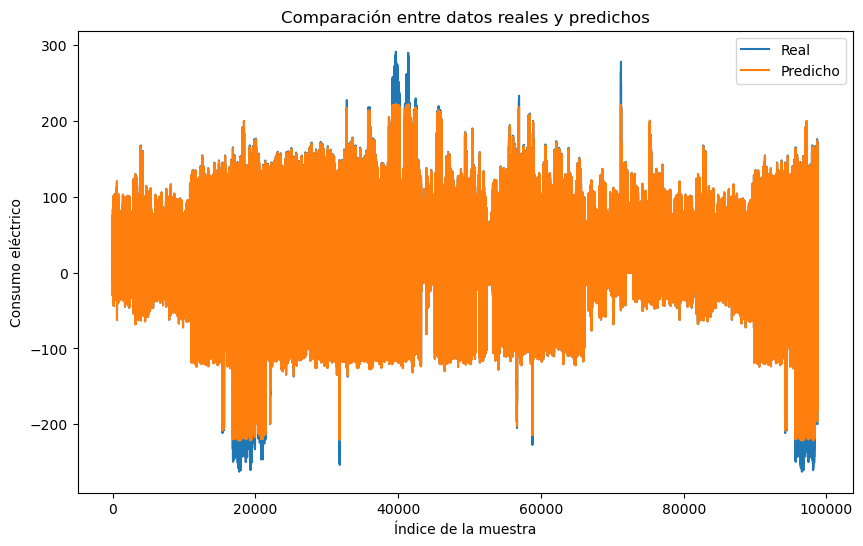

In [56]:
# Obtener las predicciones del modelo y transformarlas a 1D
predictions = model.predict(X_test_reshaped).flatten()

# Graficar la comparación entre los datos predichos y los reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real')
plt.plot(predictions, label='Predicho')
plt.title('Comparación entre datos reales y predichos')
plt.xlabel('Índice de la muestra')
plt.ylabel('Consumo eléctrico')
plt.legend()
plt.show()

# ELSALTO Model

In [58]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar los datos de consumo eléctrico de 2018 a 2021 para entrenamiento
train_data = pd.read_csv('substation/ELSALTO_2018_2021.csv')

# Cargar los datos de consumo eléctrico de 2022 para prueba
test_data = pd.read_csv('substation/ELSALTO_2022.csv')

# Seleccionar solo las columnas numéricas
numeric_columns_train = train_data.select_dtypes(include=[np.number]).columns
numeric_columns_test = test_data.select_dtypes(include=[np.number]).columns

# Seleccionar las columnas numéricas para el entrenamiento y la prueba
X_train = train_data[numeric_columns_train]
y_train = train_data['consumption']

X_test = test_data[numeric_columns_test]
y_test = test_data['consumption']

# Normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


model = Sequential([
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='tanh'),
    Dense(1, activation='linear')
])

# Compilar el modelo
model.compile(optimizer='Adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=25, batch_size=180, validation_data=(X_test_reshaped, y_test))



# Guardar el modelo entrenado
model.save('KerasModels/ModelOneELSALTO.keras')

Epoch 1/25
776/776 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 7030.5674 - val_loss: 3896.9912
Epoch 2/25
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2764.5332 - val_loss: 2065.9290
Epoch 3/25
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1815.8479 - val_loss: 1708.6323
Epoch 4/25
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1711.5657 - val_loss: 1664.8051
Epoch 5/25
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1710.8894 - val_loss: 1663.4758
Epoch 6/25
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1697.7579 - val_loss: 1656.9696
Epoch 7/25
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1687.4958 - val_loss: 1661.1091
Epoch 8/25
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1718.4077 - val_loss: 1663.5413
Epoch 9/25
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1695.6641 - val_loss: 1652.2518
Epoch 10/25
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1714.7522 - val_loss: 1657.9260
Epoch 11/25
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1214.8057 - val_lo

In [59]:
# Evaluación del modelo
y_pred = model.predict(X_test_reshaped).flatten()  # Aplanar y_pred para convertirlo en una matriz 1D

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1))) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)

1372/1372 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step
Mean Absolute Error (MAE): 0.3690714323022265
Mean Squared Error (MSE): 0.16828011927797948
Mean Absolute Percentage Error (MAPE): 0.9676922887190755
R^2 Score: 0.9998945276032026


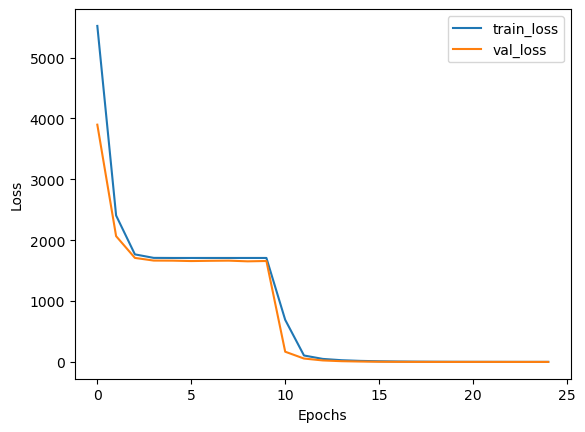

In [60]:
# Graficar la pérdida en función de las épocas
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1372/1372 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step


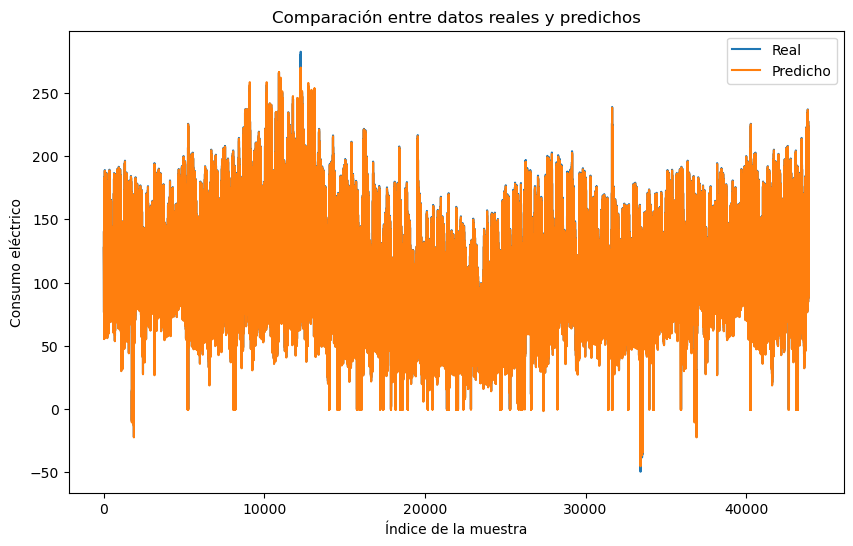

In [61]:
# Obtener las predicciones del modelo y transformarlas a 1D
predictions = model.predict(X_test_reshaped).flatten()

# Graficar la comparación entre los datos predichos y los reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real')
plt.plot(predictions, label='Predicho')
plt.title('Comparación entre datos reales y predichos')
plt.xlabel('Índice de la muestra')
plt.ylabel('Consumo eléctrico')
plt.legend()
plt.show()

# FLORIDA Model

In [63]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar los datos de consumo eléctrico de 2018 a 2021 para entrenamiento
train_data = pd.read_csv('substation/FLORIDA_2018_2021.csv')

# Cargar los datos de consumo eléctrico de 2022 para prueba
test_data = pd.read_csv('substation/FLORIDA_2022.csv')

# Seleccionar solo las columnas numéricas
numeric_columns_train = train_data.select_dtypes(include=[np.number]).columns
numeric_columns_test = test_data.select_dtypes(include=[np.number]).columns

# Seleccionar las columnas numéricas para el entrenamiento y la prueba
X_train = train_data[numeric_columns_train]
y_train = train_data['consumption']

X_test = test_data[numeric_columns_test]
y_test = test_data['consumption']

# Normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


model = Sequential([
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='tanh'),
    Dense(1, activation='linear')
])

# Compilar el modelo
model.compile(optimizer='Adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=15, batch_size=150, validation_data=(X_test_reshaped, y_test))



# Guardar el modelo entrenado
model.save('KerasModels/ModelOneFLORIDA.keras')

Epoch 1/15
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 470.9206 - val_loss: 13.7397
Epoch 2/15
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 4.4564 - val_loss: 3.9559
Epoch 3/15
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 1.6533 - val_loss: 2.6100
Epoch 4/15
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.8709 - val_loss: 0.6213
Epoch 5/15
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.5519 - val_loss: 0.3379
Epoch 6/15
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3526 - val_loss: 0.2589
Epoch 7/15
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.2404 - val_loss: 0.0945
Epoch 8/15
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.2296 - val_loss: 0.0925
Epoch 9/15
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.1730 - val_loss: 0.2492
Epoch 10/15
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.1623 - val_loss: 0.0250
Epoch 11/15
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.1527 - val_loss: 0.0583
Epoch 12/15
1863

In [64]:
# Evaluación del modelo
y_pred = model.predict(X_test_reshaped).flatten()  # Aplanar y_pred para convertirlo en una matriz 1D

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1))) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)

2743/2743 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step
Mean Absolute Error (MAE): 0.28994195543065454
Mean Squared Error (MSE): 0.10386030347649702
Mean Absolute Percentage Error (MAPE): 3.309152087552858
R^2 Score: 0.9999077834478071


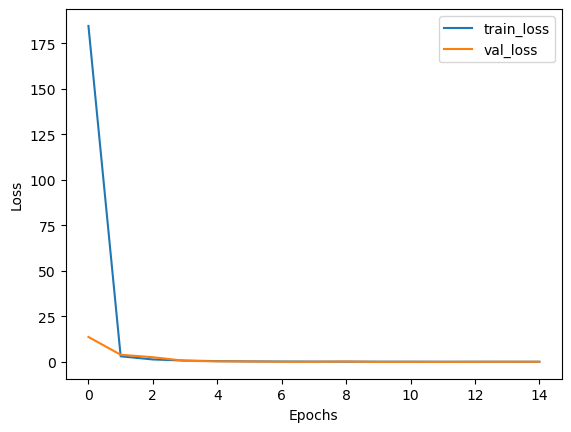

In [65]:
# Graficar la pérdida en función de las épocas
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2743/2743 ━━━━━━━━━━━━━━━━━━━━ 2s 838us/step


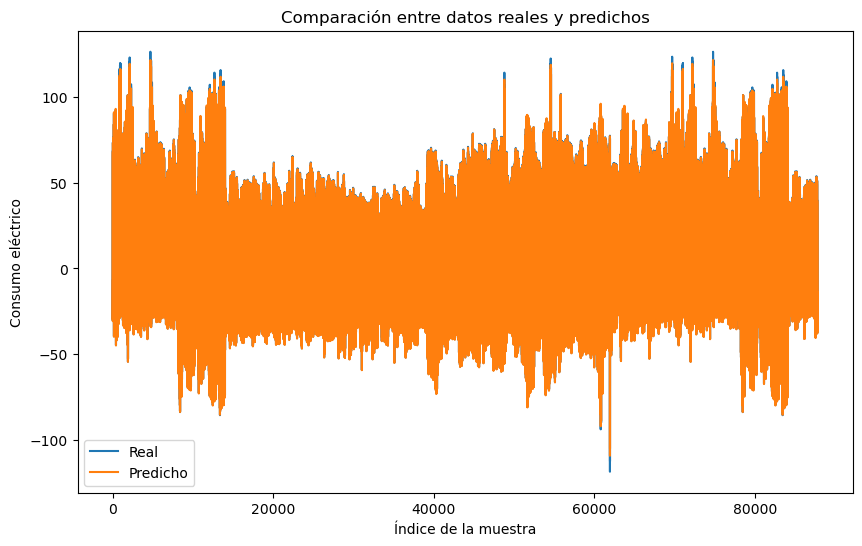

In [66]:
# Obtener las predicciones del modelo y transformarlas a 1D
predictions = model.predict(X_test_reshaped).flatten()

# Graficar la comparación entre los datos predichos y los reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real')
plt.plot(predictions, label='Predicho')
plt.title('Comparación entre datos reales y predichos')
plt.xlabel('Índice de la muestra')
plt.ylabel('Consumo eléctrico')
plt.legend()
plt.show()

# LOSALME Model

In [67]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar los datos de consumo eléctrico de 2018 a 2021 para entrenamiento
train_data = pd.read_csv('substation/LOSALME_2018_2021.csv')

# Cargar los datos de consumo eléctrico de 2022 para prueba
test_data = pd.read_csv('substation/LOSALME_2022.csv')

# Seleccionar solo las columnas numéricas
numeric_columns_train = train_data.select_dtypes(include=[np.number]).columns
numeric_columns_test = test_data.select_dtypes(include=[np.number]).columns

# Seleccionar las columnas numéricas para el entrenamiento y la prueba
X_train = train_data[numeric_columns_train]
y_train = train_data['consumption']

X_test = test_data[numeric_columns_test]
y_test = test_data['consumption']

# Normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


model = Sequential([
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='tanh'),
    Dense(1, activation='linear')
])

# Compilar el modelo
model.compile(optimizer='Adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=150, validation_data=(X_test_reshaped, y_test))



# Guardar el modelo entrenado
model.save('KerasModels/ModelOneLOSALME.keras')

Epoch 1/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1769.1647 - val_loss: 820.7278
Epoch 2/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1069.1987 - val_loss: 838.8616
Epoch 3/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1078.9274 - val_loss: 836.5793
Epoch 4/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1077.2511 - val_loss: 840.1400
Epoch 5/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1069.1046 - val_loss: 835.7289
Epoch 6/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 963.9748 - val_loss: 17.0109
Epoch 7/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 43.5227 - val_loss: 2.0868
Epoch 8/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 15.5986 - val_loss: 0.5838
Epoch 9/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 8.9149 - val_loss: 0.3770
Epoch 10/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 5.1688 - val_loss: 0.1546
Epoch 11/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.3572 - val_loss: 2.1169
Epoch 12/20
932/932 ━━

In [68]:
# Evaluación del modelo
y_pred = model.predict(X_test_reshaped).flatten()  # Aplanar y_pred para convertirlo en una matriz 1D

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1))) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)

1372/1372 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step
Mean Absolute Error (MAE): 0.2823846644472782
Mean Squared Error (MSE): 0.12757932287049092
Mean Absolute Percentage Error (MAPE): 2.3718642850807212
R^2 Score: 0.9998429672497027


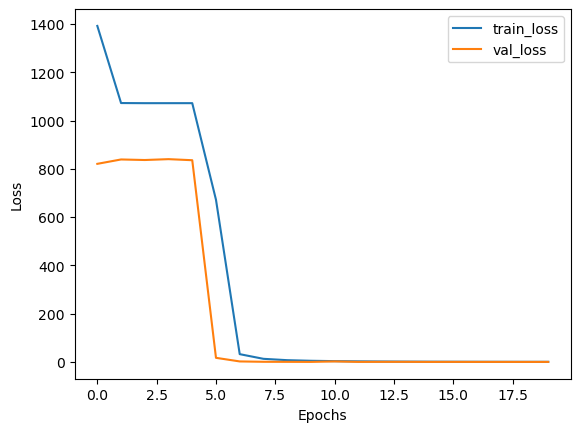

In [69]:
# Graficar la pérdida en función de las épocas
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1372/1372 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step


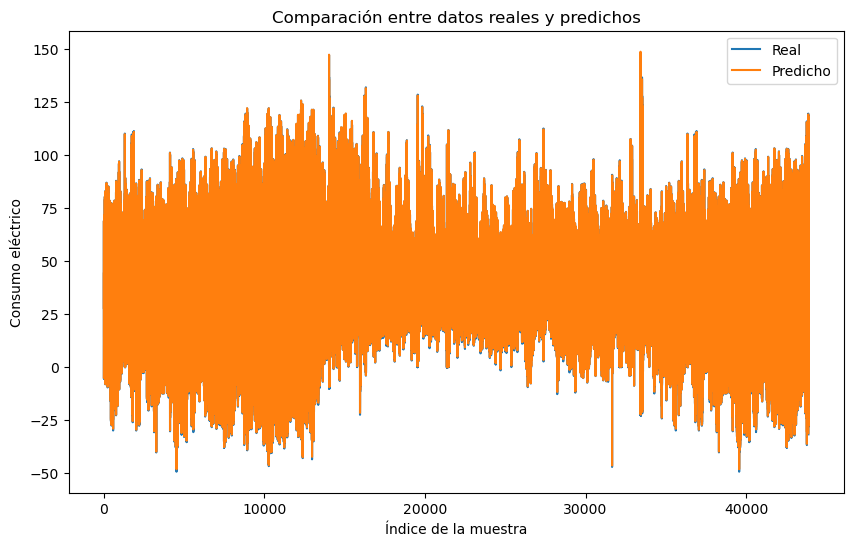

In [70]:
# Obtener las predicciones del modelo y transformarlas a 1D
predictions = model.predict(X_test_reshaped).flatten()

# Graficar la comparación entre los datos predichos y los reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real')
plt.plot(predictions, label='Predicho')
plt.title('Comparación entre datos reales y predichos')
plt.xlabel('Índice de la muestra')
plt.ylabel('Consumo eléctrico')
plt.legend()
plt.show()

# Week Test

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


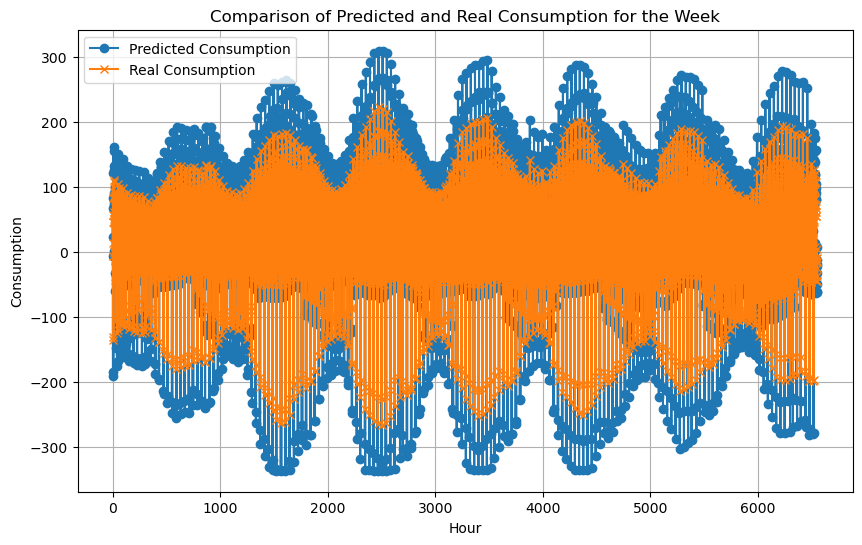

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
Mean Absolute Error (MAE): 28.30210261124534
Mean Squared Error (MSE): 1219.8987321131103
Mean Absolute Percentage Error (MAPE): 55.31698646548929
R^2 Score: 0.7783955723549157


In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el modelo entrenado
model = load_model('KerasModels/ModelOne.keras')

# Cargar los datos de consumo eléctrico de la semana
week_data = pd.read_csv('PrimeraSemana2023.csv')

# Seleccionar solo las columnas numéricas
numeric_columns_week = week_data.select_dtypes(include=[np.number]).columns

# Seleccionar las columnas numéricas para la semana
X_week = week_data[numeric_columns_week]

# Normalizar los datos de la semana usando el mismo scaler utilizado durante el entrenamiento
scaler = MinMaxScaler()
X_week_scaled = scaler.fit_transform(X_week)

# Reshape de los datos para que tengan la forma correcta
X_week_reshaped = X_week_scaled.reshape((X_week_scaled.shape[0], 1, X_week_scaled.shape[1]))

# Hacer predicciones con el modelo
predictions = model.predict(X_week_reshaped).flatten()

# Visualizar las predicciones
import matplotlib.pyplot as plt

# Crear un rango de horas para el eje x
hours = range(1, len(predictions) + 1)

# Crear un gráfico de líneas para visualizar las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(hours, predictions, label='Predicted Consumption', marker='o', linestyle='-')
plt.plot(hours, week_data['consumption'], label='Real Consumption', marker='x', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Consumption')
plt.title('Comparison of Predicted and Real Consumption for the Week')
plt.legend()
plt.grid(True)
plt.show()

# Evaluación del modelo
y_pred = model.predict(X_week_reshaped).flatten()  # Aplanar y_pred para convertirlo en una matriz 1D

mae = mean_absolute_error(week_data['consumption'], predictions)
mse = mean_squared_error(week_data['consumption'], predictions)
mape = np.mean(np.abs((week_data['consumption'] - predictions) / np.maximum(np.abs(week_data['consumption']), 1))) * 100
r2 = r2_score(week_data['consumption'], predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)
